In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-simpsons-characters-dataset/weights.best.hdf5
/kaggle/input/the-simpsons-characters-dataset/annotation.txt
/kaggle/input/the-simpsons-characters-dataset/number_pic_char.csv
/kaggle/input/the-simpsons-characters-dataset/characters_illustration.png
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/milhouse_van_houten_28.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/apu_nahasapeemapetilon_42.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/krusty_the_clown_6.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/lenny_leonard_22.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/marge_simpson_16.jpg
/kaggle/input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/chief_wiggum_41.jpg
/kaggle/input/the-simpsons-characters-dat

In [2]:
!pip install caer canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 32.5 MB/s eta 0:00:00
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77056 sha256=5b38e8f9800d133a459abce0d4b60be8d866c1e500a3e008b298bca5645da969
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.14.0
    Uninstalling wrapt-1.14.0:
      Successfully uninstalled wrapt-1.14.0
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.2.0
    Uninstalling typing_extensions-4.2.0:
      Successfully uninstalled typing_extension

In [3]:
import os
import caer
import numpy as np
import cv2 as cv
import gc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
import canaro as cn

In [4]:
image_size = (80,80)
channels = 1
charac_loc = "../input/the-simpsons-characters-dataset/simpsons_dataset"

In [5]:
char_dict = dict()
for char in os.listdir(charac_loc):
    if char == "simpsons_dataset":
        pass
    else:
        char_dict[char] = len(os.path.join(charac_loc, char))

# Sorting char_dict
char_dict = caer.sort_dict(char_dict, descending =True)
char_dict

[('charles_montgomery_burns', 82),
 ('abraham_grampa_simpson', 80),
 ('apu_nahasapeemapetilon', 80),
 ('professor_john_frink', 78),
 ('groundskeeper_willie', 78),
 ('milhouse_van_houten', 77),
 ('rainier_wolfcastle', 76),
 ('principal_skinner', 75),
 ('krusty_the_clown', 74),
 ('waylon_smithers', 73),
 ('cletus_spuckler', 73),
 ('maggie_simpson', 72),
 ('edna_krabappel', 72),
 ('comic_book_guy', 72),
 ('snake_jailbird', 72),
 ('martin_prince', 71),
 ('barney_gumble', 71),
 ('patty_bouvier', 71),
 ('marge_simpson', 71),
 ('selma_bouvier', 71),
 ('agnes_skinner', 71),
 ('kent_brockman', 71),
 ('lenny_leonard', 71),
 ('homer_simpson', 71),
 ('ralph_wiggum', 70),
 ('ned_flanders', 70),
 ('sideshow_mel', 70),
 ('mayor_quimby', 70),
 ('troy_mcclure', 70),
 ('carl_carlson', 70),
 ('chief_wiggum', 70),
 ('bart_simpson', 70),
 ('nelson_muntz', 70),
 ('lisa_simpson', 70),
 ('sideshow_bob', 70),
 ('lionel_hutz', 69),
 ('moe_szyslak', 69),
 ('miss_hoover', 69),
 ('otto_mann', 67),
 ('disco_stu', 6

In [6]:
characters = [char_dict[i][0] for i in range(0,11)]
characters

['charles_montgomery_burns',
 'abraham_grampa_simpson',
 'apu_nahasapeemapetilon',
 'professor_john_frink',
 'groundskeeper_willie',
 'milhouse_van_houten',
 'rainier_wolfcastle',
 'principal_skinner',
 'krusty_the_clown',
 'waylon_smithers',
 'cletus_spuckler']

In [7]:
# Training Data
train = caer.preprocess_from_dir(charac_loc, characters,
                                 channels = channels, IMG_SIZE= image_size, 
                                  isShuffle= True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] 1193 files found in 0.045797109603881836s
[INFO] 913 files found in 0.0067408084869384766s
[INFO] 623 files found in 0.002948284149169922s
[INFO] 65 files found in 0.0007996559143066406s
[INFO] 121 files found in 0.0009684562683105469s
[INFO] At 1000 files
[INFO] 1079 files found in 0.004870176315307617s
[INFO] 45 files found in 0.0006175041198730469s
[INFO] At 1000 files
[INFO] 1194 files found in 0.03122568130493164s
[INFO] At 1000 files
[INFO] 1206 files found in 0.03484201431274414s
[INFO] 181 files found in 0.0012569427490234375s
[INFO] 47 files found in 0.0006687641143798828s
----------------------------------------------
[INFO] 6667 files preprocessed! Took 1m 6s


In [8]:
len(train)

6667

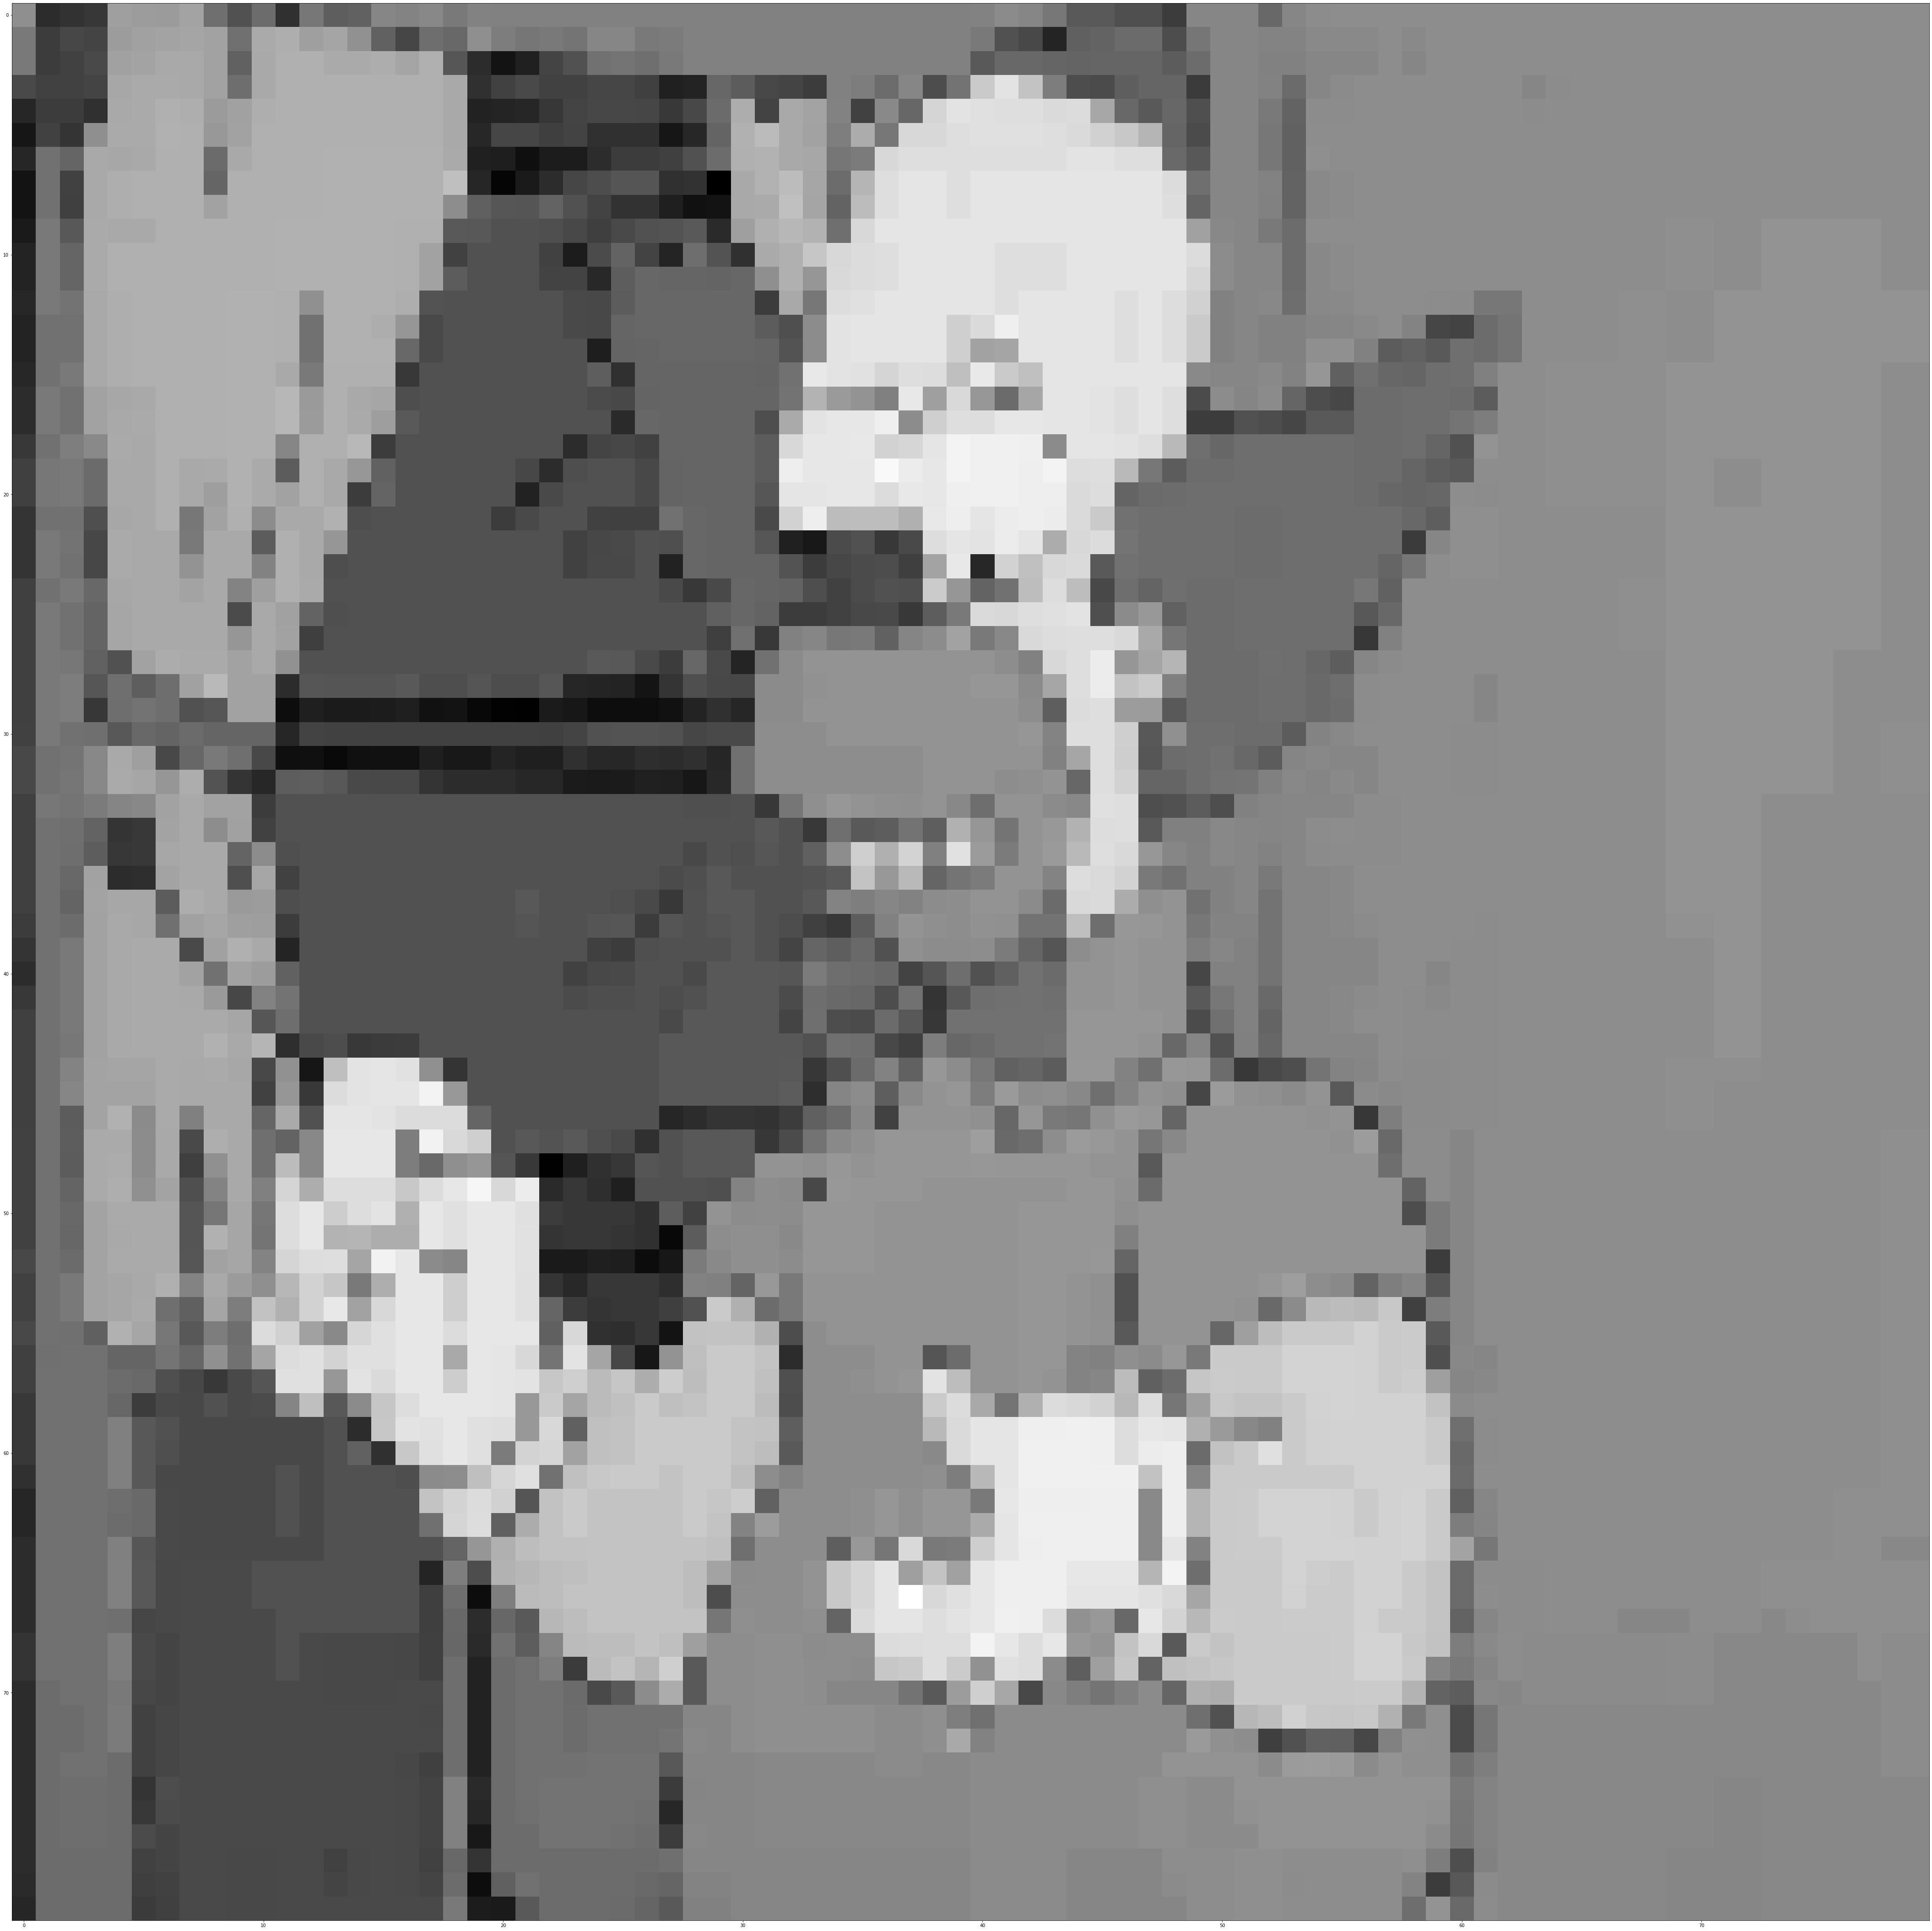

In [9]:
plt.figure(figsize=(80,80))
plt.imshow(train[0][0], cmap="gray")
plt.show()

In [10]:
train_img, label = caer.sep_train(train, IMG_SIZE=image_size)

In [11]:
# Normalizing features ---> (0,1)
Norm_train_img = caer.normalize(train_img)
labels = to_categorical(label, num_classes= len(characters))

In [12]:
# Spliting data between train and validation set
x_train, x_val, y_train, y_val = caer.train_val_split(Norm_train_img, labels, val_ratio= 0.1)

In [13]:
del train
del label
del train_img
gc.collect()

21

In [14]:
BATCH_SIZE = 64
EPOCHS = 50

In [15]:
# Image data generator
datagen = cn.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size =BATCH_SIZE)

In [16]:
# MODEL
model = cn.models.createSimpsonsModel(IMG_SIZE=image_size, channels= channels,
                                     output_dim= len(characters), loss= "binary_crossentropy",
                                     decay = 1e-6, learning_rate=0.001, momentum=0.9, nesterov= True)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [18]:
callbacks = [LearningRateScheduler(cn.lr_schedule)]

In [19]:
training = model.fit(train_gen, steps_per_epoch= len(x_train)//BATCH_SIZE,
                    epochs = EPOCHS, validation_data= (x_val, y_val),
                    validation_steps= len(y_val)//BATCH_SIZE, callbacks=callbacks)

Epoch 1/50
93/93 [==============================] - 14s 63ms/step - loss: 0.3265 - accuracy: 0.1698 - val_loss: 0.2776 - val_accuracy: 0.1572
Epoch 2/50
93/93 [==============================] - 4s 47ms/step - loss: 0.2665 - accuracy: 0.1928 - val_loss: 0.2763 - val_accuracy: 0.2096
Epoch 3/50
93/93 [==============================] - 5s 53ms/step - loss: 0.2654 - accuracy: 0.2057 - val_loss: 0.2743 - val_accuracy: 0.2021
Epoch 4/50
93/93 [==============================] - 5s 49ms/step - loss: 0.2642 - accuracy: 0.2145 - val_loss: 0.2728 - val_accuracy: 0.2126
Epoch 5/50
93/93 [==============================] - 6s 59ms/step - loss: 0.2628 - accuracy: 0.2234 - val_loss: 0.2722 - val_accuracy: 0.2425
Epoch 6/50
93/93 [==============================] - 4s 47ms/step - loss: 0.2614 - accuracy: 0.2384 - val_loss: 0.2711 - val_accuracy: 0.3069
Epoch 7/50
93/93 [==============================] - 5s 51ms/step - loss: 0.2590 - accuracy: 0.2570 - val_loss: 0.2714 - val_accuracy: 0.2769
Epoch 8/50
9

# Testing

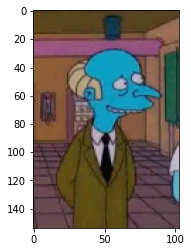

In [20]:
test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/charles_montgomery_burns_0.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()


In [21]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, image_size)
    image = caer.reshape(image, image_size, 1)
    return image

predictions = model.predict(prepare(img))
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

charles_montgomery_burns
